# 타이타닉 : 사회·경제적 지위가 생존에 미친 영향은 어떤가?

| 변수명        | 의미               | 주석               |
| ---------- | ---------------- | ---------------- |
| `Pclass`   | 객실 등급 (1\~3)     | 사회적 계층 구분 기준     |
| `Fare`     | 운임 요금            | 경제 수준을 간접 반영     |
| `Embarked` | 탑승한 항구 (S, C, Q) | 지역적 특성/인프라 반영    |
| `Cabin`    | 객실 번호            | 유무 여부로 상류층 추정 가능 |

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install koreanize_matplotlib


[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import koreanize_matplotlib

In [4]:
%config InlineBackend.figure_format = 'retina'

In [5]:
ttn = sns.load_dataset('titanic')
ttn.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


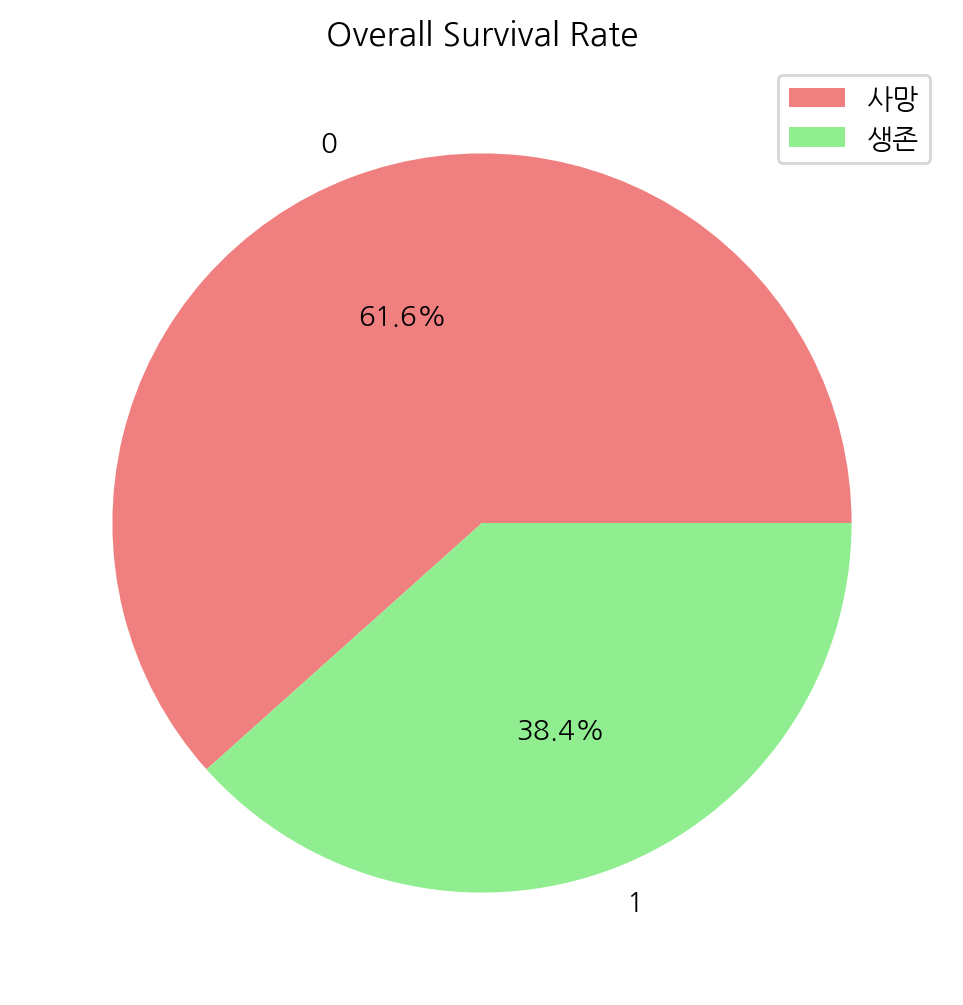

In [86]:
# 사망/생존 비율

labels = ttn['survived'].value_counts().index
sizes = ttn['survived'].value_counts().values

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%.1f%%', colors=['lightcoral', 'lightgreen'])
plt.title('Overall Survival Rate')
plt.legend(labels=['사망','생존'])
plt.show()

## 1️⃣ pclass (선실 등급)

Text(0.5, 1.0, '객실 등급 별 생존/사망 수')

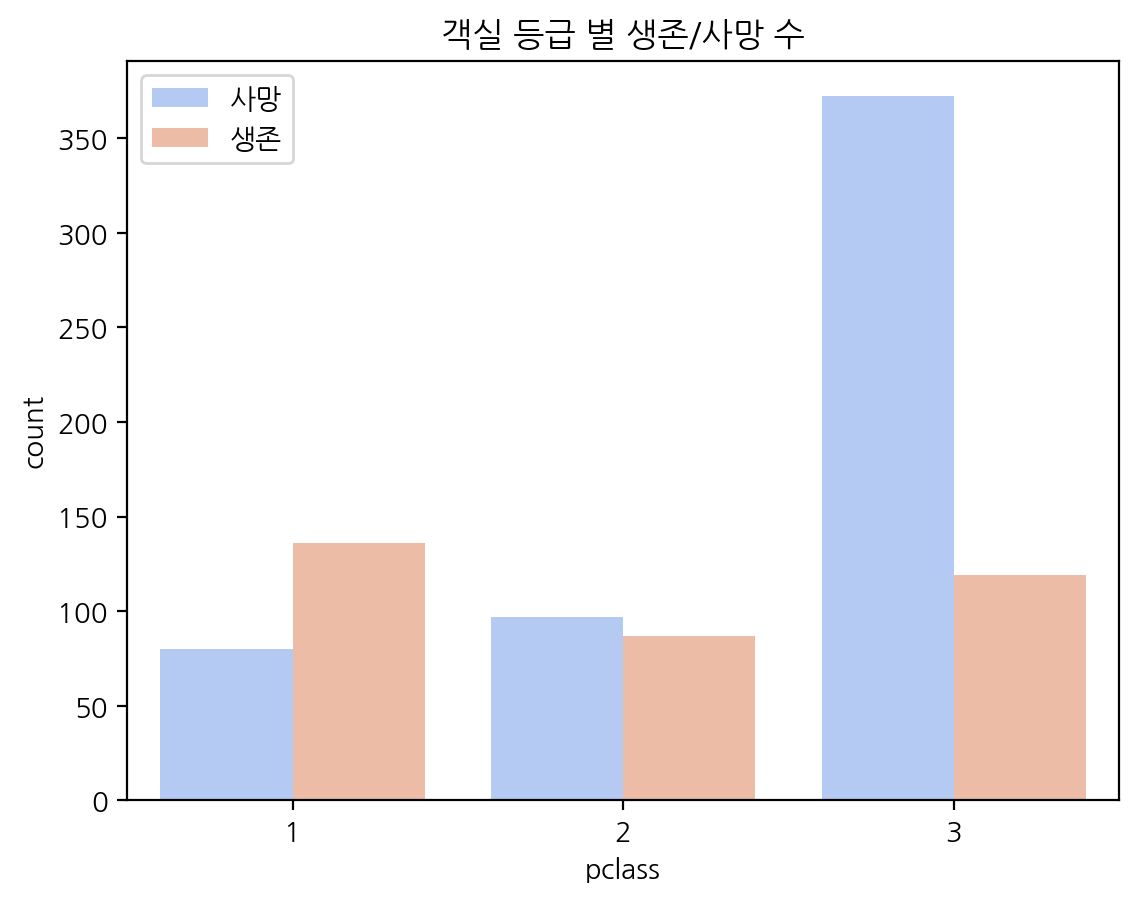

In [14]:
# 객실 등급 별 생존/사망 수

sns.countplot(x='pclass', hue='survived', data=ttn, palette='coolwarm')
plt.legend(labels=['사망', '생존'])
plt.title("객실 등급 별 생존/사망 수")

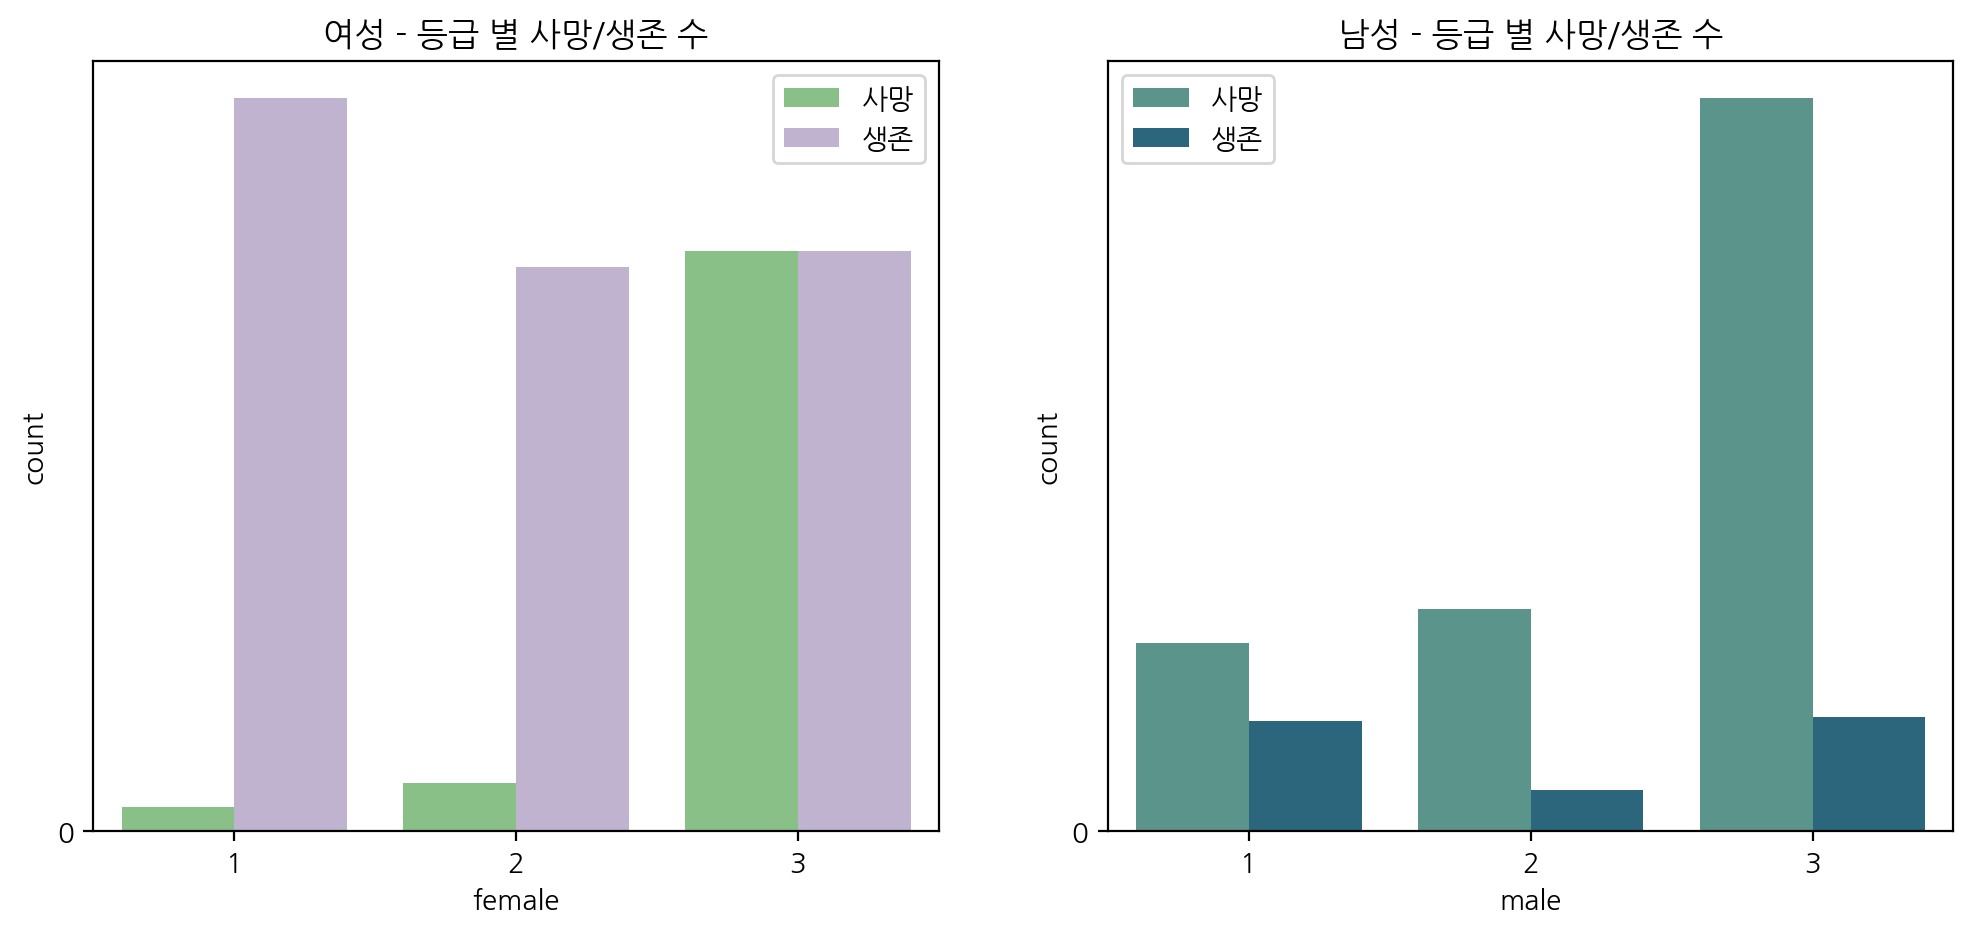

In [16]:
plt.figure(figsize=(12, 5))



# 여성 - 등급 별 사망/생존 수
plt.subplot(1, 2, 1)
sns.countplot(data=ttn[ttn['sex'] == 'female'], x = 'pclass', hue='survived', palette='Accent')
plt.yticks(np.arange(0, 500, 500))
plt.legend(labels=['사망','생존'])
plt.xlabel("female")
plt.ylabel("count")
plt.title("여성 - 등급 별 사망/생존 수")


# 남성 - 등급 별 사망/생존 수
plt.subplot(1, 2, 2)
sns.countplot(data=ttn[ttn['sex'] == 'male'], x = 'pclass', hue='survived', palette='crest')
plt.yticks(np.arange(0, 500, 500))
plt.legend(labels=['사망', '생존'])
plt.xlabel("male")
plt.ylabel("count")
plt.title("남성 - 등급 별 사망/생존 수")


plt.show()

## 2️⃣ Embarked (탑승지)

| 값   | 의미          | 도시 이름 | 지역   |
| --- | ----------- | ----- | ---- |
| `S` | Southampton | 사우샘프턴 | 영국   |
| `C` | Cherbourg   | 셰르부르  | 프랑스  |
| `Q` | Queenstown  | 퀸스타운  | 아일랜드 |


Text(0.5, 1.0, '탑승지별 사망/생존 수')

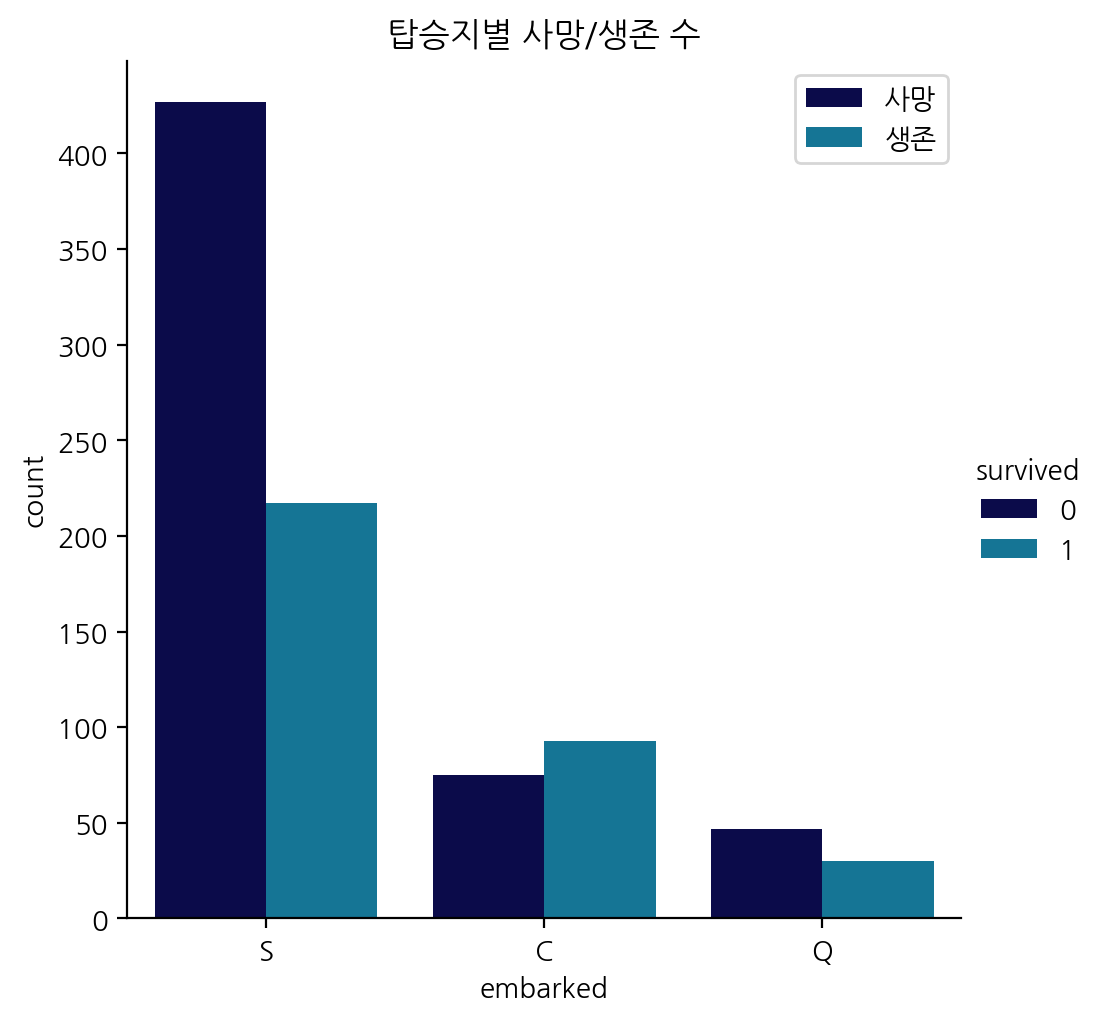

In [17]:
# 탑승지별 사망/생존 수

sns.catplot(x='embarked',hue ='survived', kind='count', data=ttn, palette='ocean')
plt.legend(labels=['사망', '생존'])
plt.title("탑승지별 사망/생존 수")

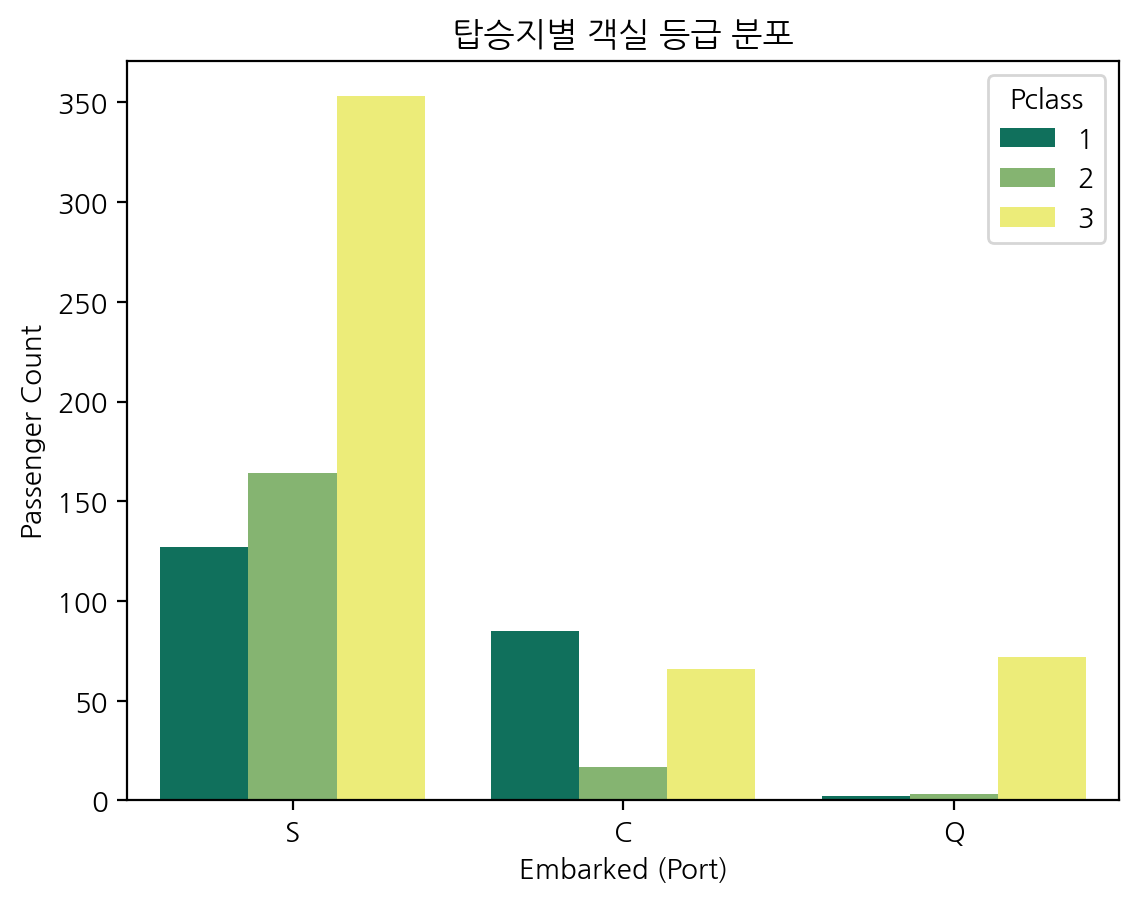

In [18]:
# 탑승지별 객실 등급 분포 (막대그래프)

sns.countplot(data=ttn, x='embarked', hue='pclass', palette='summer')
plt.title("탑승지별 객실 등급 분포")
plt.xlabel("Embarked (Port)")
plt.ylabel("Passenger Count")
plt.legend(title="Pclass")
plt.show()

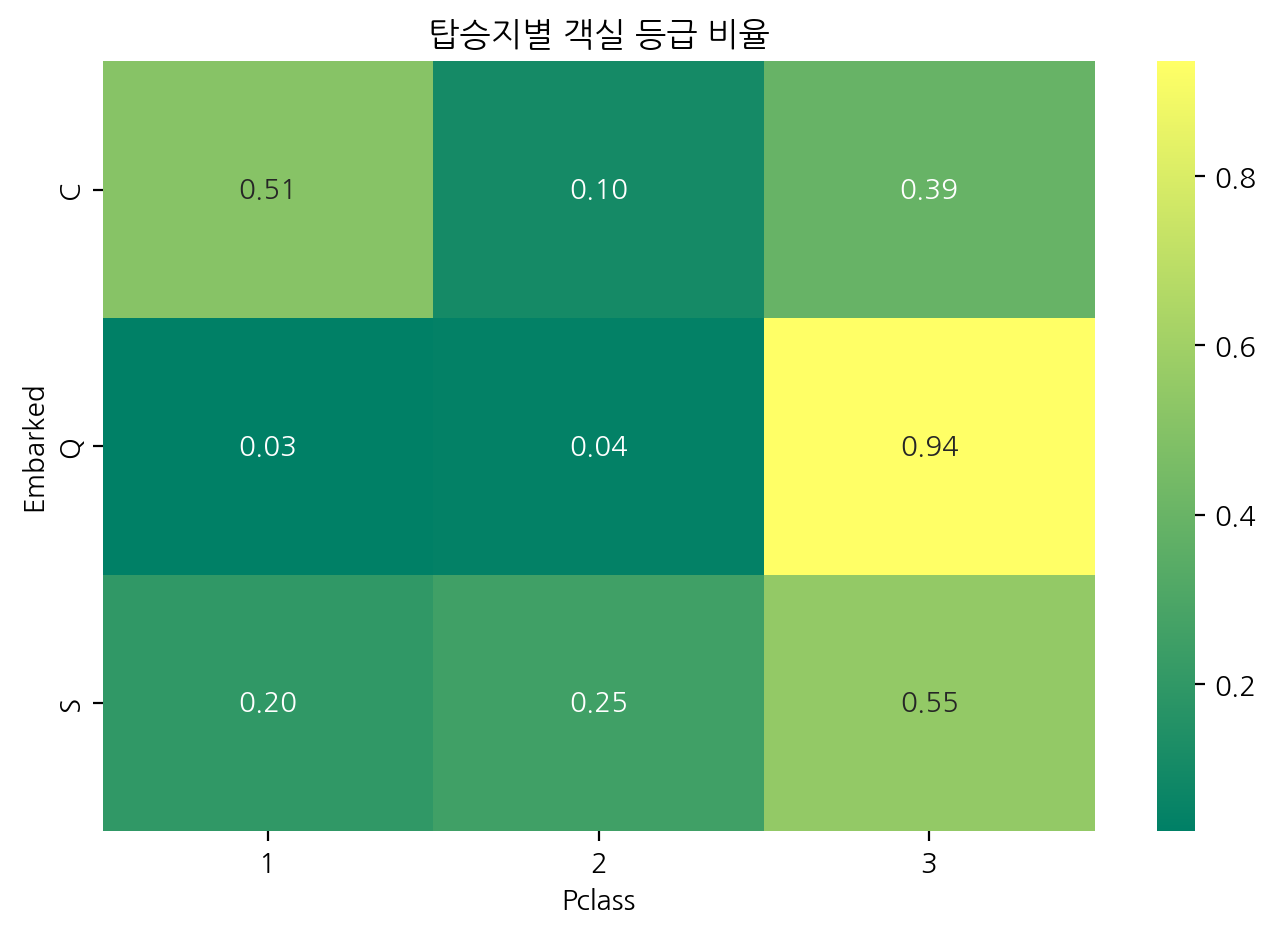

In [19]:
# 탑승지별 객실 등급 비율 (히트맵)

heat_data = pd.crosstab(ttn['embarked'], ttn['pclass'], normalize='index')  # index 기준 정규화
plt.figure(figsize=(8, 5))
sns.heatmap(heat_data, annot=True, fmt=".2f", cmap='summer')
plt.title("탑승지별 객실 등급 비율")
plt.xlabel("Pclass")
plt.ylabel("Embarked")
plt.show()

# = C 항구의 1등석 비율이 0.51로 가장 많았고, Q 항구의 3등석 비율이 0.94로 가장 많음

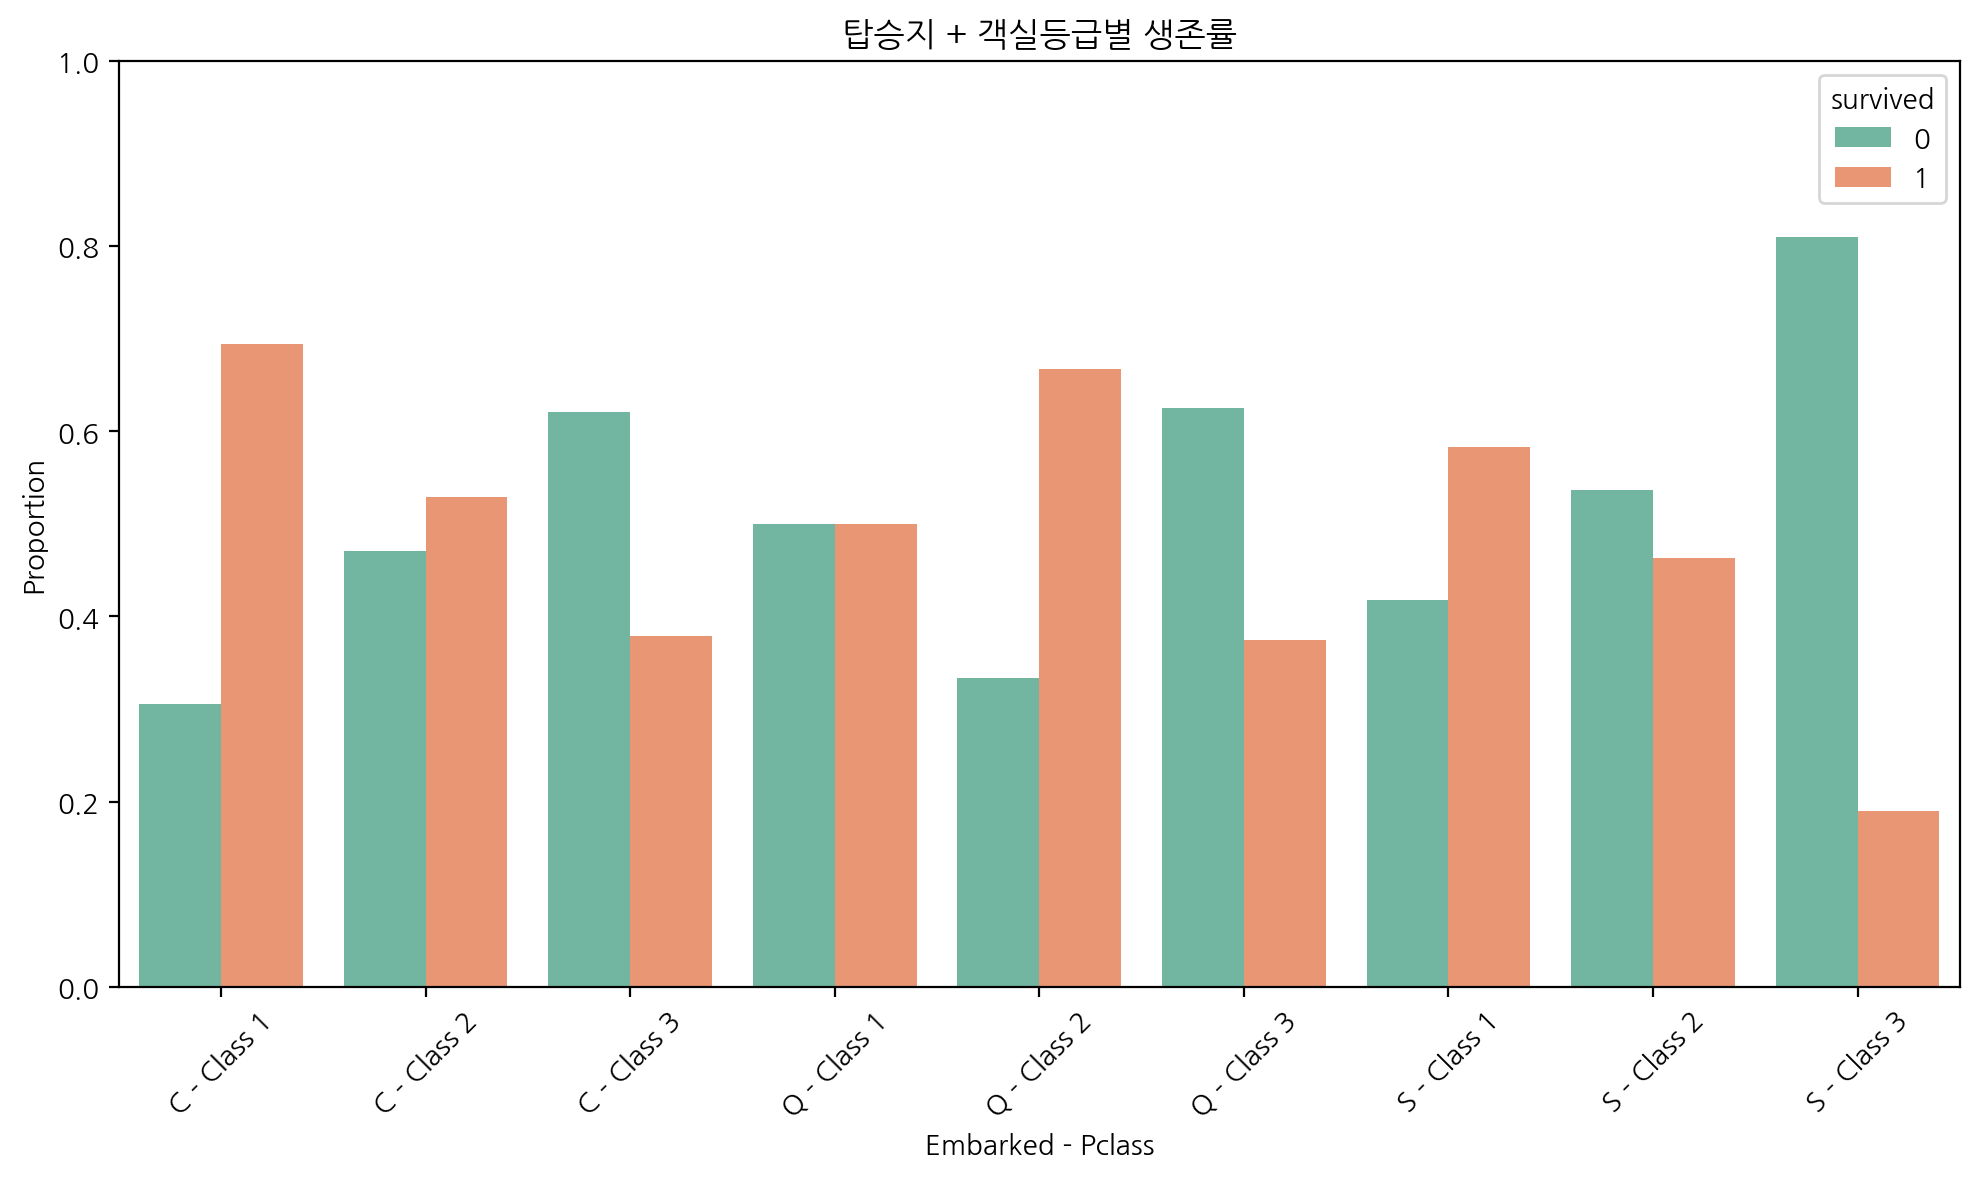

In [20]:
# 탑승지 + 객실등급별 생존률

grouped = ttn.groupby(['embarked', 'pclass', 'survived']).size().reset_index(name='count')

# 각 (Embarked, Pclass) 조합 기준으로 정규화
grouped['percent'] = grouped.groupby(['embarked', 'pclass'])['count'].transform(lambda x: x / x.sum())

# x축 라벨 조합으로 묶기
grouped['label'] = grouped['embarked'].astype(str) + ' - Class ' + grouped['pclass'].astype(str)

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped, x='label', y='percent', hue='survived', palette='Set2')

plt.title("탑승지 + 객실등급별 생존률")
plt.ylabel("Proportion")
plt.xlabel("Embarked - Pclass")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.legend(title="survived")

plt.tight_layout()
plt.show()

## 3️⃣ Deck (객실 층)

| Deck | 설명                        | 계층 추정        |
|------|-----------------------------|------------------|
| A    | 상층 갑판, 고급 객실        | 최상위층 (1등석) |
| B    | 고급 객실, 넓은 공간        | 1등석 중심       |
| C    | 중앙 상층, 좋은 위치        | 상류층           | 높음               |
| D    | 비교적 중간층, 접근성 좋음  | 1~2등석 혼합     |
| E    | 아래층, 중저가 객실         | 2등석 중심       |
| F    | 하층, 소음 많은 구역        | 3등석 중심       |
| G    | 가장 아래층, 제한적 사용    | 저소득층         |
| T    | 매우 특이한 객실(1개 존재)  | 불명             |
| NaN  | 객실 정보 없음              | 주로 3등석       |


In [32]:
ttn['deck_initial'] = ttn['deck'].astype(str).str[0]

In [33]:
ttn.groupby('deck_initial')['survived'].mean().sort_values(ascending=False)

deck_initial
D    0.757576
E    0.750000
B    0.744681
F    0.615385
C    0.593220
G    0.500000
A    0.466667
n    0.299419
Name: survived, dtype: float64

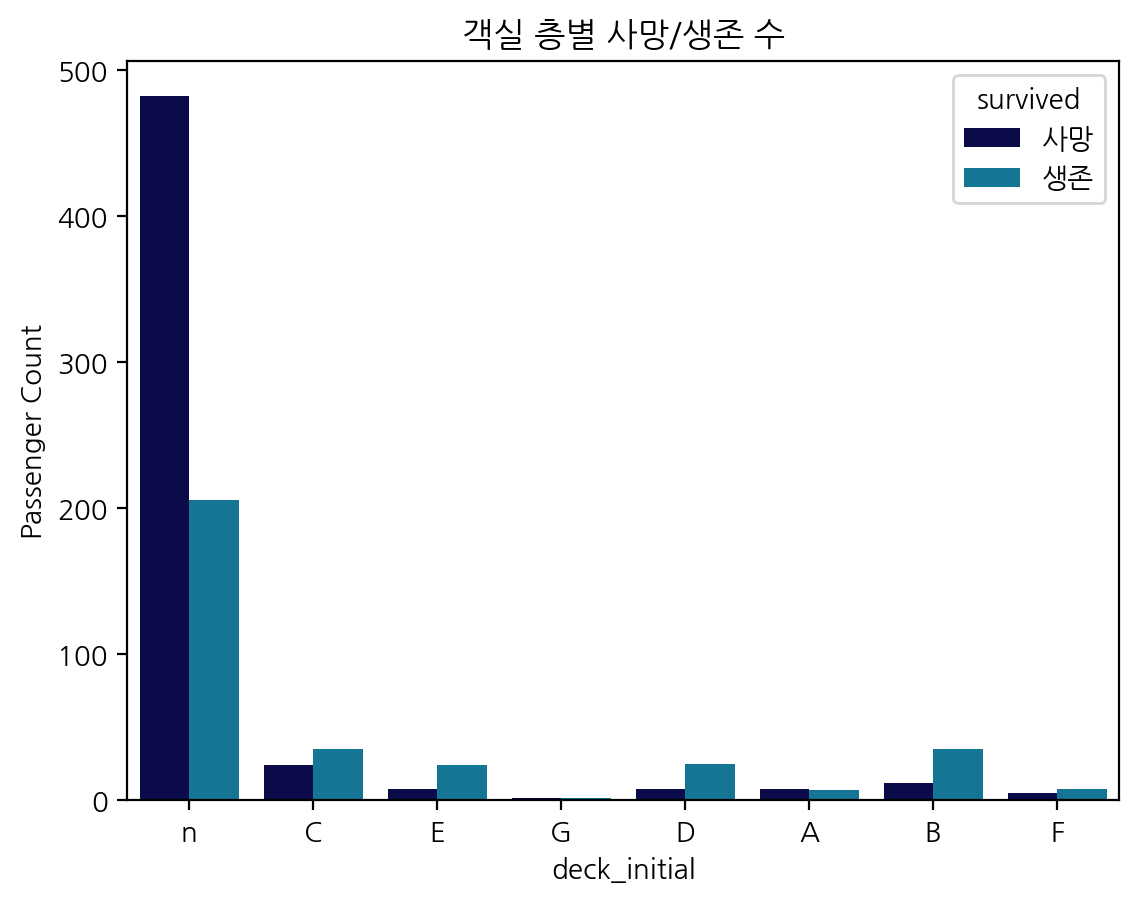

In [38]:
# 객실 층별 사망/생존 수

sns.countplot(data=ttn, x='deck_initial', hue='survived', palette='ocean')
plt.title("객실 층별 사망/생존 수")
plt.xlabel("deck_initial")
plt.ylabel("Passenger Count")
plt.legend(title="survived", labels=['사망', '생존'])
plt.show()

# = Nan(주로 3등석)이 사망자 수가 월등히 높음

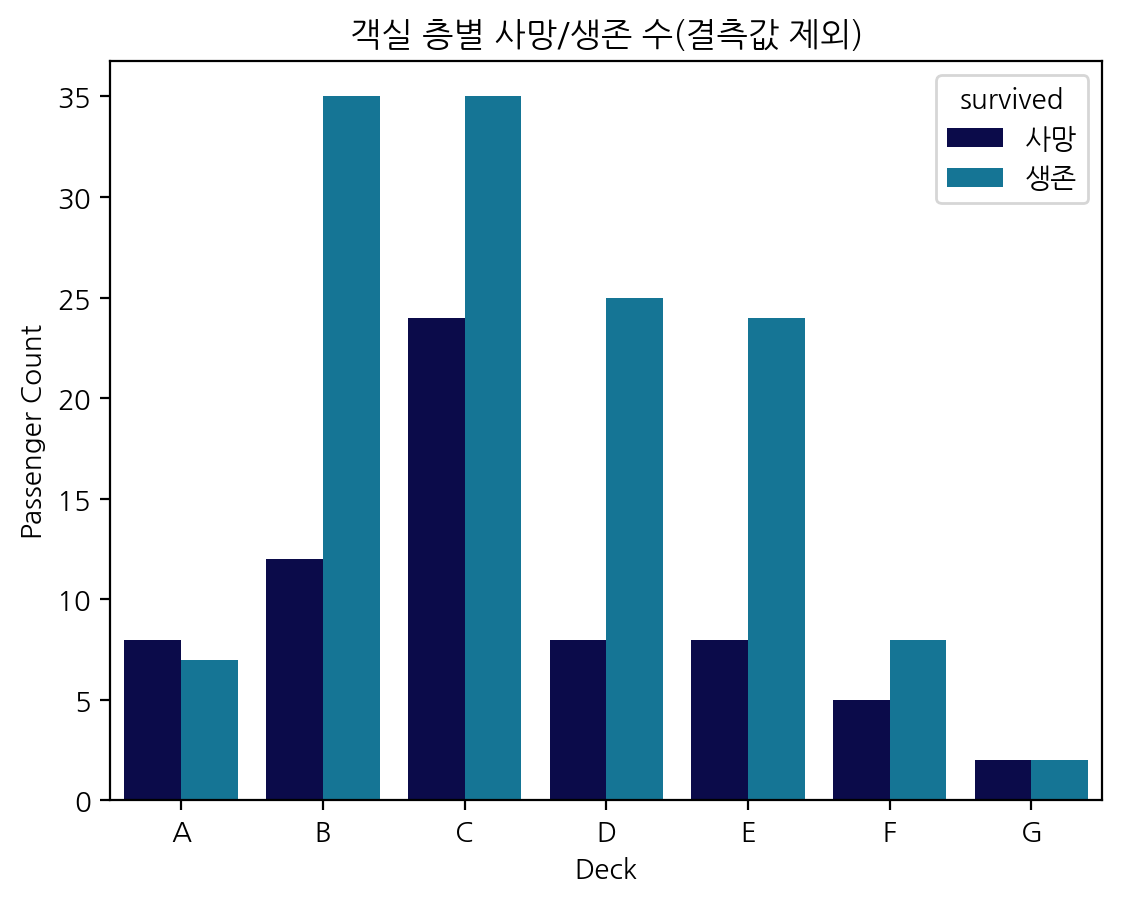

In [43]:
# 결측값 제거한 객실 층별 사망/생존 수

filtered = ttn[ttn['deck'].notna()]

# 그래프
sns.countplot(data=filtered, x='deck', hue='survived', palette='ocean')
plt.title("객실 층별 사망/생존 수(결측값 제외)")
plt.xlabel("Deck")
plt.ylabel("Passenger Count")
plt.legend(title="survived", labels=['사망', '생존'])
plt.show()

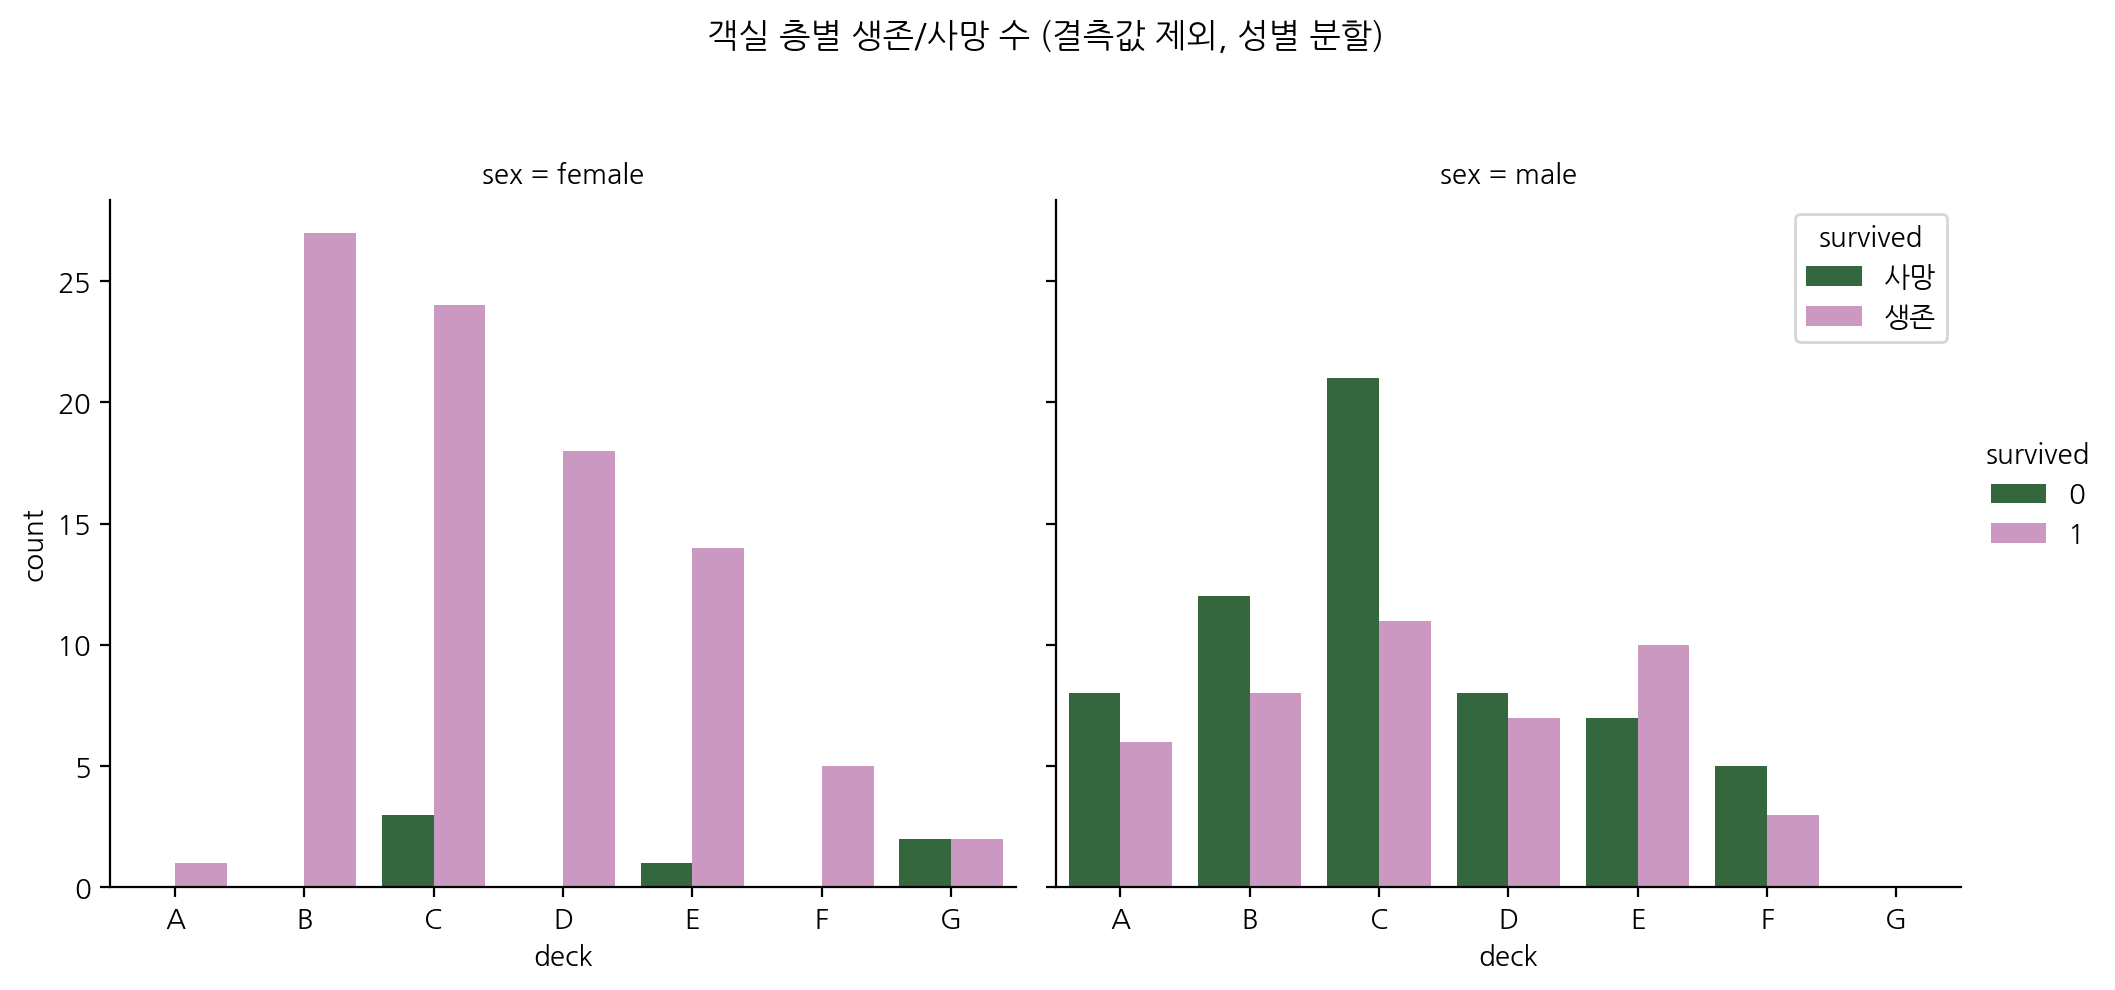

In [50]:
# 객실 층별 생존/사망 수 (결측값 제외, 성별 분할)

filtered = ttn[ttn['deck'].notna()]

sns.catplot(data=filtered, x='deck', hue='survived', col='sex',
            kind='count', palette='cubehelix', height=5, aspect=1)

plt.subplots_adjust(top=0.8)
plt.suptitle("객실 층별 생존/사망 수 (결측값 제외, 성별 분할)")
plt.legend(title='survived',labels=['사망','생존'])
plt.show()


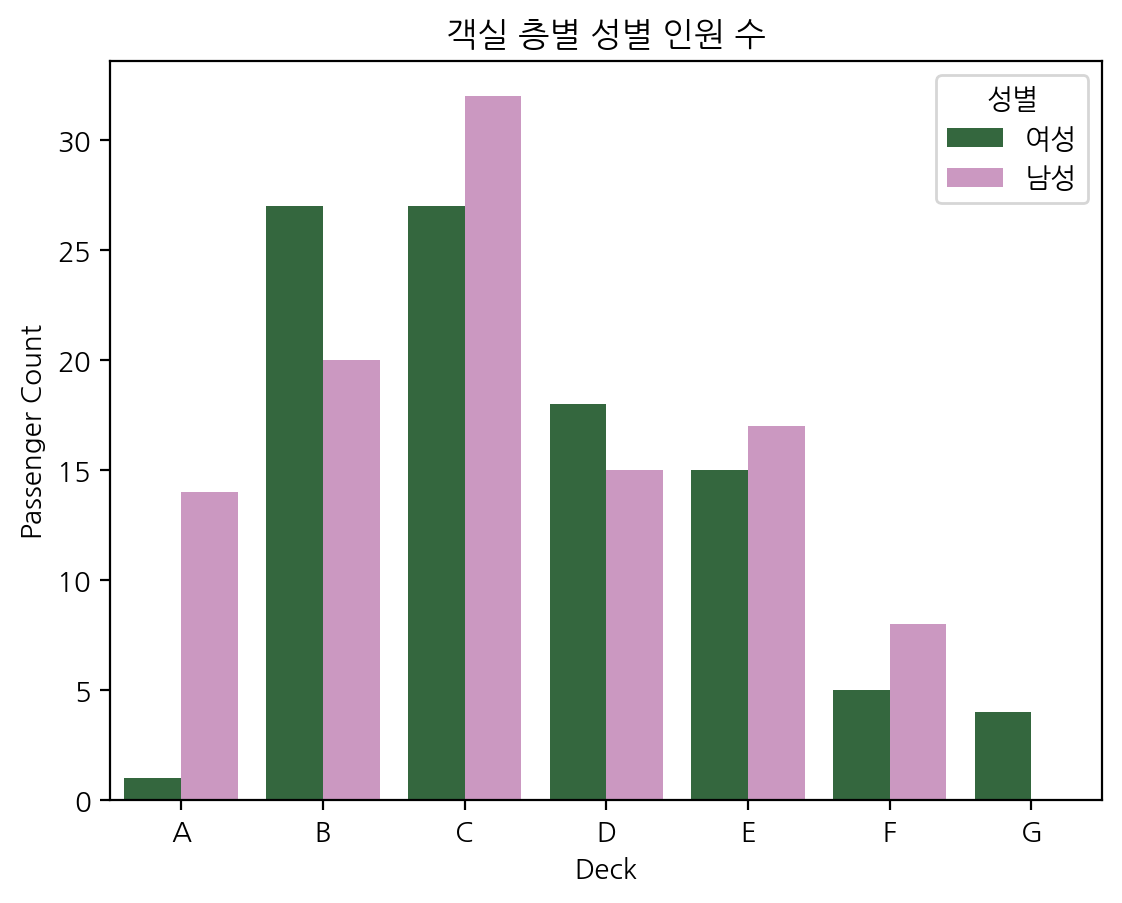

In [51]:
# 객실 층별 성별 인원 수

sns.countplot(data=filtered, x='deck', hue='sex', palette='cubehelix')
plt.title("객실 층별 성별 인원 수")
plt.xlabel("Deck")
plt.ylabel("Passenger Count")
plt.legend(title="성별", labels=["여성", "남성"])
plt.show()

# = 위와 아래 그래프를 비교해 보면, B층과 C층에 여성 승객의 비율이 높아 해당 층의 높은 생존률과 관련이 있는 것으로 보임.

# 4️⃣ Fare (운임 요금)

C:\Users\admin\AppData\Local\Temp\ipykernel_31664\2931647033.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Fare_bin', y='survived', data=ttn, palette= 'cool')


Text(0.5, 1.0, '운임 요금에 따른 생존률')

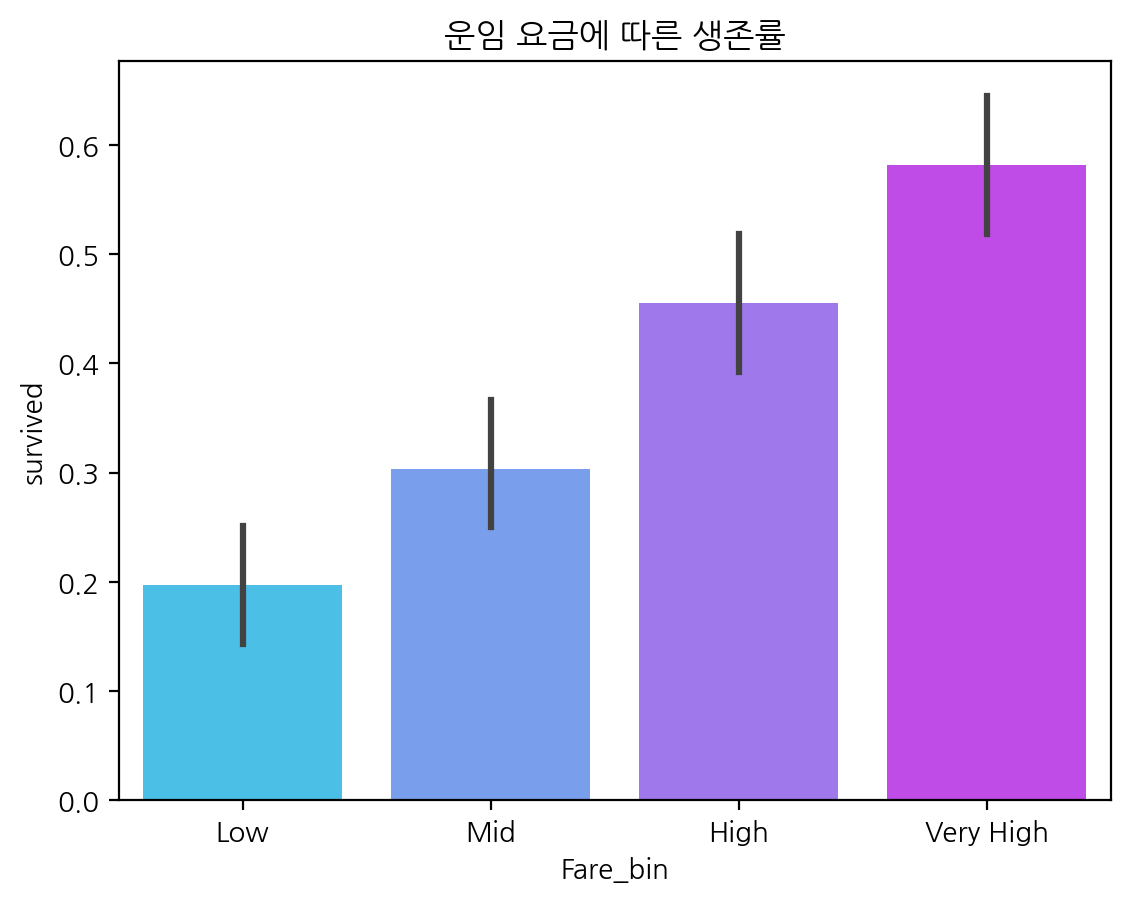

In [66]:
# 운임 요금에 따른 생존률

ttn['Fare_bin'] = pd.qcut(ttn['fare'], q=4, labels=['Low', 'Mid', 'High', 'Very High'])
sns.barplot(x='Fare_bin', y='survived', data=ttn, palette= 'cool')
plt.title("운임 요금에 따른 생존률")

C:\Users\admin\AppData\Local\Temp\ipykernel_31664\2614426112.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='pclass', y='fare', data=ttn, palette='cool')


Text(0.5, 1.0, '선실 등급과 운임 요금의 관계')

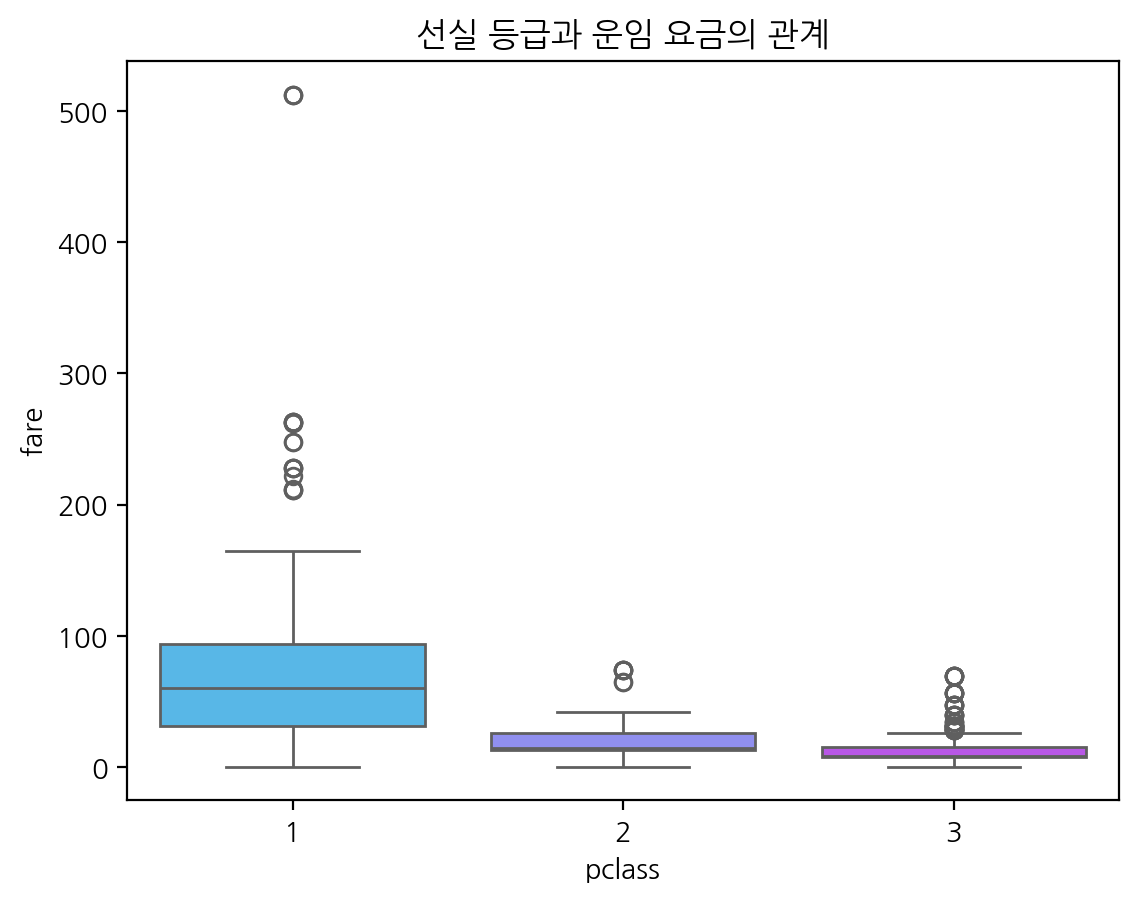

In [73]:
# 선실 등급과 운임 요금의 관계

sns.boxplot(x='pclass', y='fare', data=ttn, palette='cool')
plt.title("선실 등급과 운임 요금의 관계")

# = 1등석 승객의 운임은 평균적으로 가장 높았고, 이상치도 많이 존재해 상류층 승객 사이에서도 가격 차이가 컸음을 알 수 있다. 반면 3등석은 전반적으로 운임이 낮고, 분포도 상대적으로 좁았음.

C:\Users\admin\AppData\Local\Temp\ipykernel_31664\2221458187.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=ttn, x='survived', y='fare', palette='cool')


Text(0.5, 1.0, '생존 여부에 따른 운임 분포')

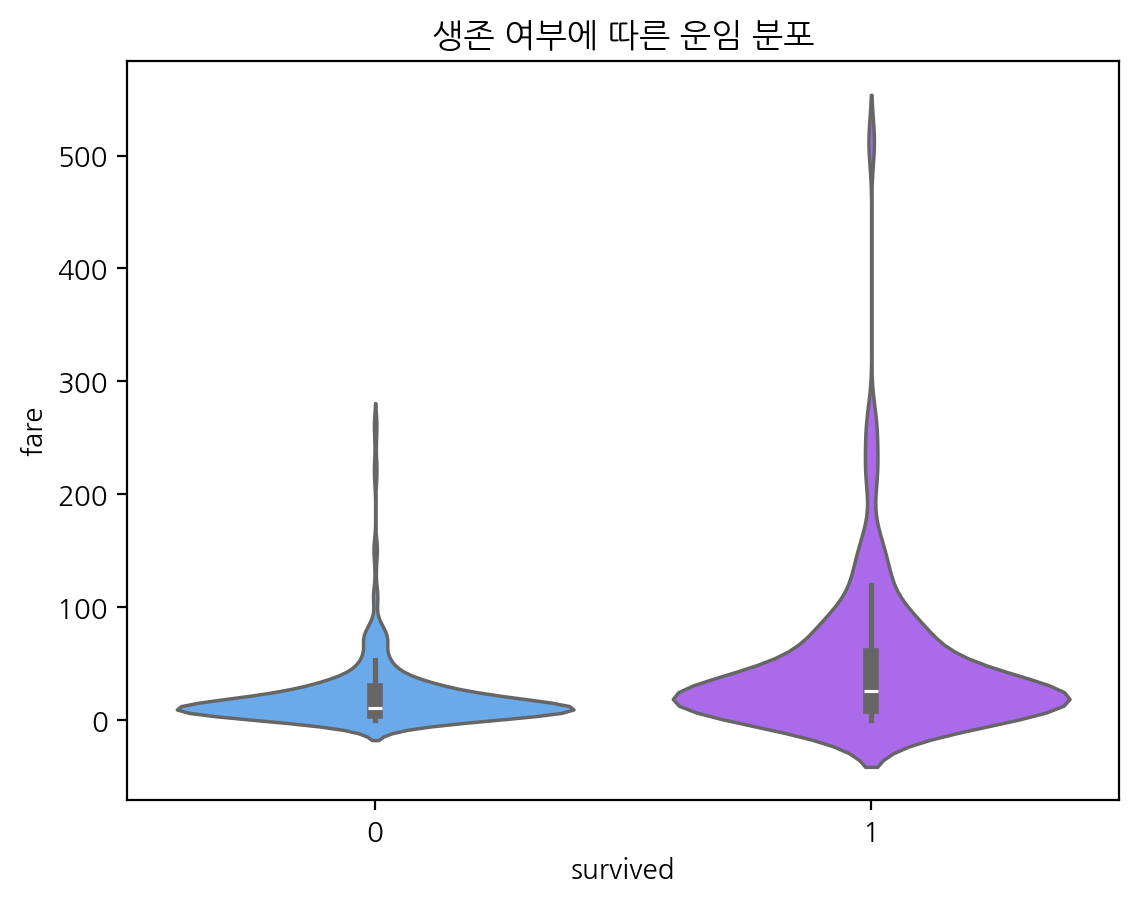

In [92]:
# 생존 여부에 따른 운임 분포
sns.violinplot(data=ttn, x='survived', y='fare', palette='cool')
plt.title("생존 여부에 따른 운임 분포")

# - 생존자와 사망자 각각의 운임 분포가 어떻게 다른지 확인할 수 있음
# - 운임이 높을수록 상류층일 가능성이 높고, 생존률도 높게 나타날 수 있음

## ---------------------------------------------------------------------------------------------------

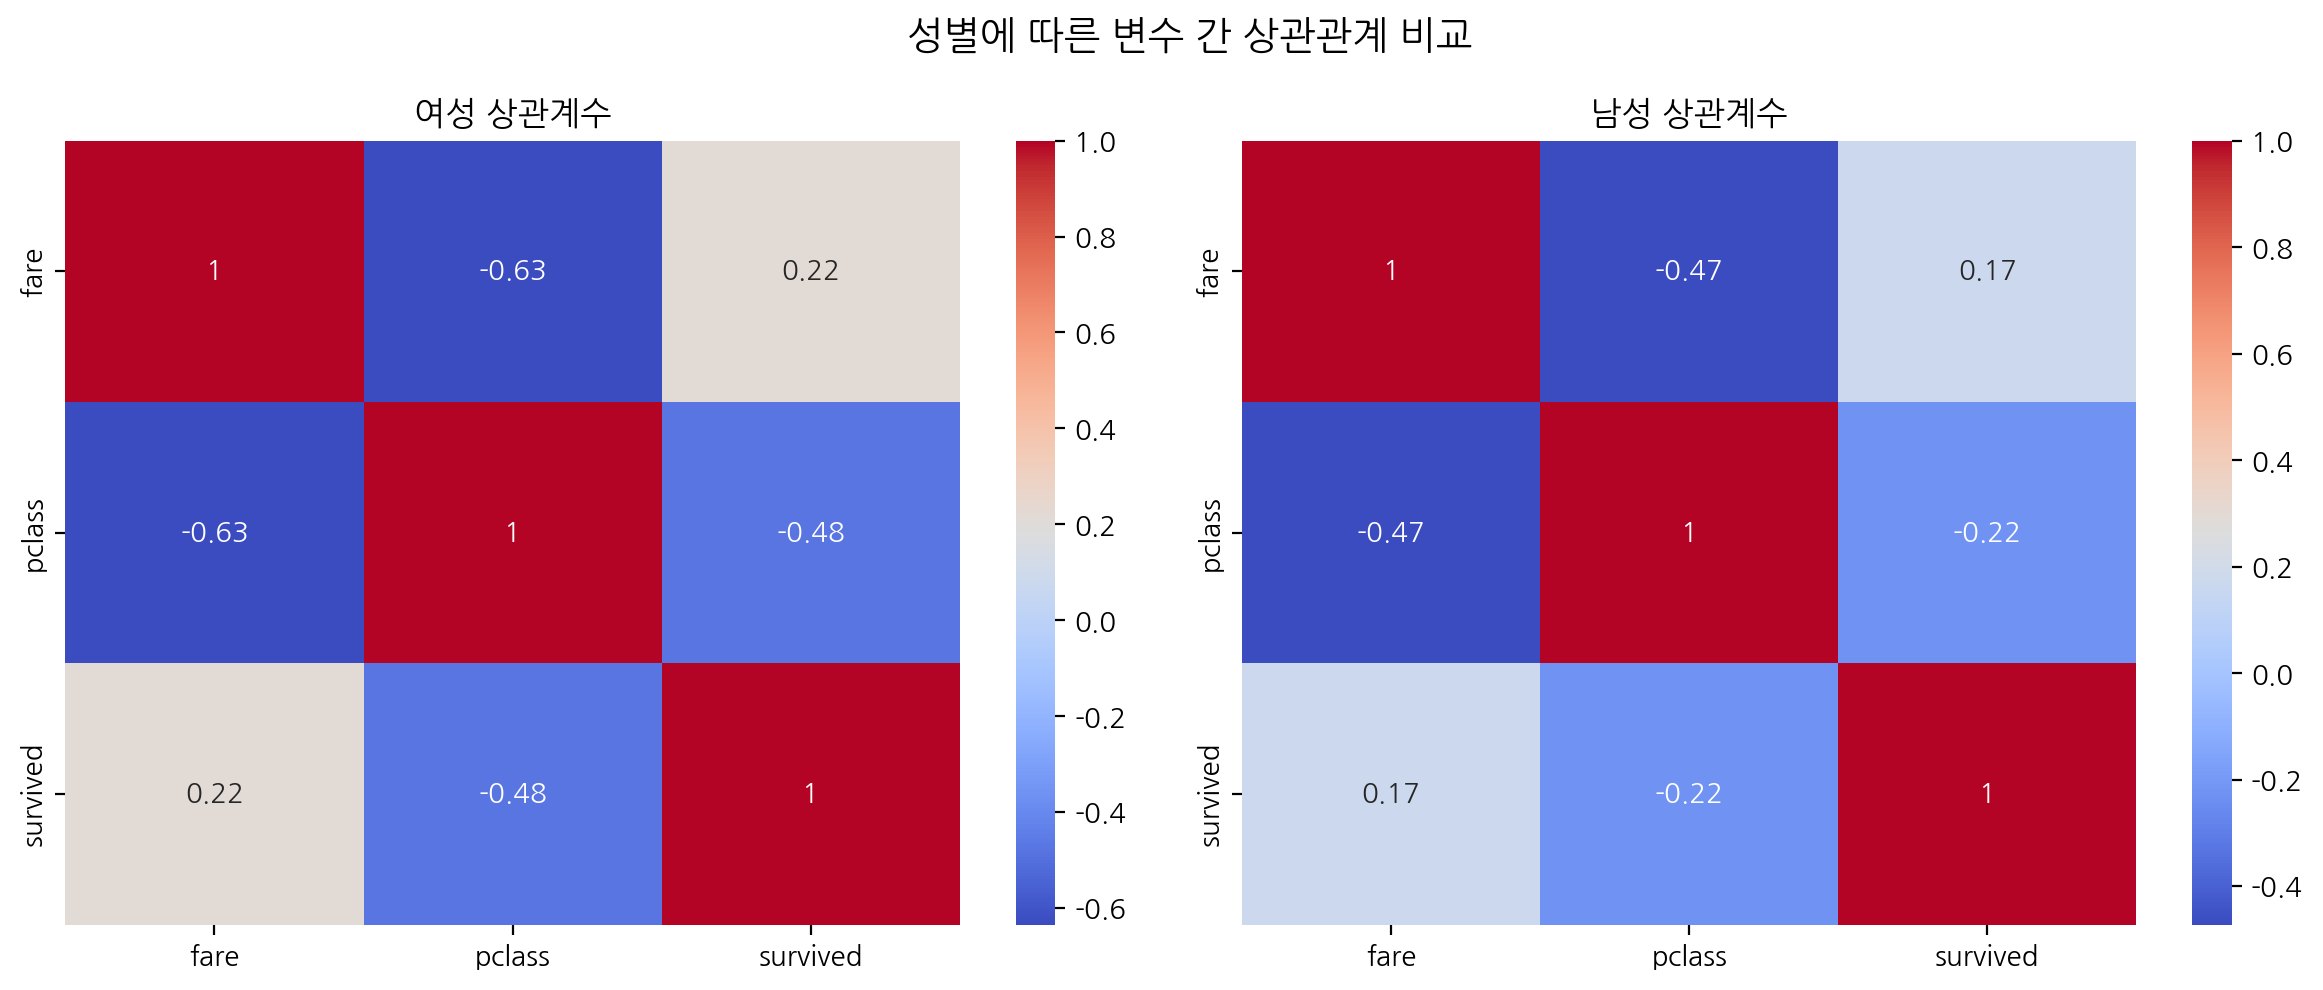

In [59]:
# 성별(female/male)에 따라 생존(Survived), 운임(Fare), 객실등급(Pclass) 변수들 간의 상관관계

female = ttn[ttn['sex'] == 'female']
male = ttn[ttn['sex'] == 'male']

# 히트맵 그리기 (1행 2열 subplot)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# 여성
sns.heatmap(female[['fare', 'pclass', 'survived']].corr(), annot=True,
            cmap='coolwarm', ax=axes[0])
axes[0].set_title("여성 상관계수")

# 남성
sns.heatmap(male[['fare', 'pclass', 'survived']].corr(), annot=True,
            cmap='coolwarm', ax=axes[1])
axes[1].set_title("남성 상관계수")

plt.suptitle("성별에 따른 변수 간 상관관계 비교", fontsize=14)
plt.tight_layout()
plt.show()

# 파란색(cool)은 음의 상관관계, 붉은색(warm)은 양의 상관관계를 의미하며, 숫자가 1에 가까울수록 강한 상관관계를 나타냄
# - 여성의 경우 Fare(운임)과 Survived(생존) 간 양의 상관관계가 더 강하게 나타남.
# - 마찬가지로 남성도 Fare(운임)와 Survived 간의 양의 상관관계가 상대적으로 강하게 나타남을 알 수 있음.

#   → 결과적으로 운임이 높을수록 생존률 또한 높아지는 경향을 보여, Fare 변수는 생존 여부와 유의미한 관련이 있는 것으로 나타남.